In [29]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#pd.set_option('display.max_rows', 500)

In [31]:
def createDataFrame(stock, start, end):
    df = stock.history(start=start, end=end)

    df["Change"] = df["Close"].pct_change() # 전날 대비 변화율

    # add next 2 days' average
    #df["Next2"] = df["Close"].rolling(window=2).mean().shift(-2)

    # add next 5 days' average
    df["Next5"] = df["Close"].rolling(window=5).mean().shift(-5)



    # df.index = pd.to_datetime(df.index).strftime("%Y-%m-%d") # 날짜 형식 간단하게 만들기
	
    # 지표 데이터
    # df2 = pd.read_csv("/Users/ryujonghyeok/Jonghyeok/Sejong/SAI/자료모음집.csv") 
    # df = pd.merge(df, df2, on="Date") """

    # df.set_index("Date", inplace=True)

    return df

In [32]:
# Define the stock
stock = yf.Ticker("SPY")

# Create a dataframe from 'start' to 'end'
start="2022-04-01"
end="2024-04-30"

df = createDataFrame(stock, start, end)
df = df[["Close", "Change", "Next5"]]
df

,Close,Change,Next5
Date,,,
2022-04-01 00:00:00-04:00,439.016846,NaN,436.320184
2022-04-04 00:00:00-04:00,442.777679,0.008566,433.047821
2022-04-05 00:00:00-04:00,437.184814,-0.012631,430.578046
2022-04-06 00:00:00-04:00,432.813232,-0.009999,429.955743
2022-04-07 00:00:00-04:00,434.994171,0.005039,427.827161
...,...,...,...
2024-04-23 00:00:00-04:00,505.649994,0.011867,NaN
2024-04-24 00:00:00-04:00,505.410004,-0.000475,NaN
2024-04-25 00:00:00-04:00,503.489990,-0.003799,NaN


In [33]:
# FEDFUNDS: Federal Funds Effective Rate
# DFEDTARU: Federal Funds Target Range - Upper Limit
# CPIAUCSL: Consumer Price Index for All Urban Consumers: All Items in U.S. City Average
# DGS10: Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis


# access CPI.csv file in 'data' folder
cpiaucsl = pd.read_csv('data/CPIAUCSL.csv')
dfedtaru = pd.read_csv('data/DFEDTARU.csv')
dgs10 = pd.read_csv('data/DGS10.csv')
fedfunds = pd.read_csv('data/FEDFUNDS.csv')
unrate = pd.read_csv('data/UNRATE.csv')


# convert 'DATE' column to datetime
cpiaucsl['DATE'] = pd.to_datetime(cpiaucsl['DATE'])
dfedtaru['DATE'] = pd.to_datetime(dfedtaru['DATE'])
dgs10['DATE'] = pd.to_datetime(dgs10['DATE'])
fedfunds['DATE'] = pd.to_datetime(fedfunds['DATE'])
unrate['DATE'] = pd.to_datetime(unrate['DATE'])

# set start and end date with dataframe data type
start = pd.to_datetime(start)
end = pd.to_datetime(end)

# combine fed, cpi, treasury using merge from start to end
data = pd.merge(fedfunds, cpiaucsl, on='DATE', how='outer')
data = pd.merge(data, dfedtaru, on='DATE', how='outer')
data = pd.merge(data, dgs10, on='DATE', how='outer')
data = pd.merge(data, unrate, on='DATE', how='outer')
data = data[(data['DATE'] >= start) & (data['DATE'] <= end)]
data = data.replace(".", np.NaN)
data = data.ffill()

data.index = data['DATE']
data = data.drop(columns=['DATE'])

data

,FEDFUNDS,CPIAUCSL,DFEDTARU,DGS10,UNRATE
DATE,,,,,
2022-04-01,0.33,288.764,0.5,2.39,3.7
2022-04-02,0.33,288.764,0.5,2.39,3.7
2022-04-03,0.33,288.764,0.5,2.39,3.7
2022-04-04,0.33,288.764,0.5,2.42,3.7
2022-04-05,0.33,288.764,0.5,2.54,3.7
...,...,...,...,...,...
2024-04-26,5.33,312.230,5.5,4.67,3.9
2024-04-27,5.33,312.230,5.5,4.67,3.9
2024-04-28,5.33,312.230,5.5,4.67,3.9


In [34]:
# Convert 'df' to tz-aware dataframe
df = df.tz_localize(None)

# Combine 'df' and 'data' dataframe respect to 'DATE' as index
df = pd.merge(df, data, left_index=True, right_index=True, how='inner')

df

,Close,Change,Next5,FEDFUNDS,CPIAUCSL,DFEDTARU,DGS10,UNRATE
2022-04-01,439.016846,NaN,436.320184,0.33,288.764,0.5,2.39,3.7
2022-04-04,442.777679,0.008566,433.047821,0.33,288.764,0.5,2.42,3.7
2022-04-05,437.184814,-0.012631,430.578046,0.33,288.764,0.5,2.54,3.7
2022-04-06,432.813232,-0.009999,429.955743,0.33,288.764,0.5,2.61,3.7
2022-04-07,434.994171,0.005039,427.827161,0.33,288.764,0.5,2.66,3.7
...,...,...,...,...,...,...,...,...
2024-04-23,505.649994,0.011867,NaN,5.33,312.230,5.5,4.61,3.9
2024-04-24,505.410004,-0.000475,NaN,5.33,312.230,5.5,4.65,3.9
2024-04-25,503.489990,-0.003799,NaN,5.33,312.230,5.5,4.7,3.9
2024-04-26,508.260010,0.009474,NaN,5.33,312.230,5.5,4.67,3.9


In [35]:
# import the scikit learn linear regression model
from sklearn.linear_model import LinearRegression

# create a linear regression model between 'Close' and 'CPIAUCSL', 'DFEDTARU', 'DGS10', 'FEDFUNDS', 'UNRATE
model = LinearRegression()

# x = df[['CPIAUCSL', 'DFEDTARU', 'DGS10', 'FEDFUNDS', 'UNRATE']]
x = df.iloc[:-5][['CPIAUCSL', 'DFEDTARU', 'DGS10', 'FEDFUNDS', 'UNRATE']]

# y = df['Close']
y = df.iloc[:-5]['Next5']


model.fit(x, y) # train the model

# print the model coefficients 
print(model.coef_)
print(model.intercept_)
print(model.score(x, y))

""" # add predicted 'Close' values to the dataframe
df['Predicted Close'] = model.predict(x)

# plot the 'Close' and 'Predicted Close' values
plt.plot(df.index, y, label='Close')
plt.plot(df.index, model.predict(x), label='Predicted Close')
plt.legend()
plt.show() """

[ 10.3028238    2.06833137 -39.94606748 -15.60212098  94.30222044]
-2831.2760279051568
0.8554610148828343


" # add predicted 'Close' values to the dataframe\ndf['Predicted Close'] = model.predict(x)\n\n# plot the 'Close' and 'Predicted Close' values\nplt.plot(df.index, y, label='Close')\nplt.plot(df.index, model.predict(x), label='Predicted Close')\nplt.legend()\nplt.show() "

In [36]:
df

,Close,Change,Next5,FEDFUNDS,CPIAUCSL,DFEDTARU,DGS10,UNRATE
2022-04-01,439.016846,NaN,436.320184,0.33,288.764,0.5,2.39,3.7
2022-04-04,442.777679,0.008566,433.047821,0.33,288.764,0.5,2.42,3.7
2022-04-05,437.184814,-0.012631,430.578046,0.33,288.764,0.5,2.54,3.7
2022-04-06,432.813232,-0.009999,429.955743,0.33,288.764,0.5,2.61,3.7
2022-04-07,434.994171,0.005039,427.827161,0.33,288.764,0.5,2.66,3.7
...,...,...,...,...,...,...,...,...
2024-04-23,505.649994,0.011867,NaN,5.33,312.230,5.5,4.61,3.9
2024-04-24,505.410004,-0.000475,NaN,5.33,312.230,5.5,4.65,3.9
2024-04-25,503.489990,-0.003799,NaN,5.33,312.230,5.5,4.7,3.9
2024-04-26,508.260010,0.009474,NaN,5.33,312.230,5.5,4.67,3.9


In [37]:
def buy(현금보유량, 주식보유량, 현재주가):
    if 주식보유량 == 0:
        주식보유량 = 현금보유량 // 현재주가
        현금보유량 -= 주식보유량 * 현재주가
        # print(f"Bought at {현재주가} with {주식보유량} stocks")
    return 현금보유량, 주식보유량


def sell(현금보유량, 주식보유량, 현재주가):
    if 주식보유량 > 0:
        현금보유량 += 주식보유량 * 현재주가
        주식보유량 = 0
        # print(f"Sold at {현재주가} with {주식보유량} stocks")
    return 현금보유량, 주식보유량

def total_asset(현금보유량, 주식보유량, 현재주가):
    return 현금보유량 + 주식보유량 * 현재주가

In [38]:
def score_calculate_og(i):
    # 4.76130047  -2.86062042 -31.53250228  -8.93819761  -6.0887131
    # x = df[['CPIAUCSL', 'DFEDTARU', 'DGS10', 'FEDFUNDS', 'UNRATE']]

    d_cpiaucsl = float(df.iloc[i]["CPIAUCSL"])
    d_dfedtaru = float(df.iloc[i]["DFEDTARU"])
    d_dgs10 = float(df.iloc[i]["DGS10"])
    d_fedfunds = float(df.iloc[i]["FEDFUNDS"])
    d_unrate = float(df.iloc[i]["UNRATE"])

    score = 4.76130047 * d_cpiaucsl - 2.86062042 * d_dfedtaru - 31.53250228 * d_dgs10 - 8.93819761 * d_fedfunds - 6.0887131 * d_unrate -838.334901756302

    return score

def score_calculate(i):
    # [  4.33353229  -2.0621398   -5.18311157 -15.21641093 -46.91571719]
    # -609.9466426959245

    """    # Define the stock
    stock = yf.Ticker("SPY")

    # Create a dataframe from 'start' to 'end'
    start="2016-04-01"
    end="2019-04-30" """
    d_cpiaucsl = float(df.iloc[i]["CPIAUCSL"])
    d_dfedtaru = float(df.iloc[i]["DFEDTARU"])
    d_dgs10 = float(df.iloc[i]["DGS10"])
    d_fedfunds = float(df.iloc[i]["FEDFUNDS"])
    d_unrate = float(df.iloc[i]["UNRATE"])

    score = 4.33353229 * d_cpiaucsl - 2.0621398 * d_dfedtaru - 5.18311157 * d_dgs10 - 15.21641093 * d_fedfunds - 46.91571719 * d_unrate -609.9466426959245
    return score


score_plt = []
# 복합적인 요소를 분석하여 일정 조건에 따라 매수 및 매도 반복
def strategy_score(df):
    global score_plt

    현금보유량 = 1000000
    주식보유량 = 0

    현금보유량, 주식보유량 = buy(현금보유량, 주식보유량, df.iloc[0].Close)
    for i in range(len(df)):
        
        # 점수 계산하기
        score = score_calculate(i)

        현재주가 = df.iloc[i].Close

        if i < 10:
            print(score, 현재주가)
        
        # 점수가 일정 기준보다 클 때 매수하기
        if i-1 >= 0:
            if score > df.iloc[i-1].Close * 1.01:
                현금보유량, 주식보유량 = buy(현금보유량, 주식보유량, 현재주가)

            # 점수가 일정 기준보다 작을 때 매도하기
            elif score < df.iloc[i-1].Close * 0.99:
                현금보유량, 주식보유량 = sell(현금보유량, 주식보유량, 현재주가)

        score_plt.append(total_asset(현금보유량, 주식보유량, 현재주가))

    현금보유량, 주식보유량 = sell(현금보유량, 주식보유량, df.iloc[-1].Close)


    print(f"Score 계산 - 현금보유량: {현금보유량:.2f} profit: {(현금보유량-1000000)/1000000*100:.2f}%")


In [39]:
buyAndHold_plt = []
# 시작시점에 매수 후 종료시점에 매도
def strategy_buyAndHold(df):
    global buyAndHold_plt

    현금보유량 = 1000000
    주식보유량 = 0

    현금보유량, 주식보유량 = buy(현금보유량, 주식보유량, df.iloc[0].Close)
    
    buyAndHold_plt = []
    for i in range(1, len(df)-1):
        buyAndHold_plt.append(total_asset(현금보유량, 주식보유량, df.iloc[i].Close))
    
    현금보유량 += 주식보유량 * df.iloc[-1].Close

    print(f"Hold - 현금보유량: {현금보유량:.2f}, profit: {(현금보유량-1000000)/1000000*100:.2f}%")


In [40]:
difference_plt = []
# 최고점 대비 일정 비율 하락하면 매도, 최저점 대비 일정 비율 상승하면 매수
def strategy_difference(df):
    global difference_plt
    현금보유량 = 1000000
    주식보유량 = 0
    dif1 = 0.36 # 일정 비율 하락하는 정도 🤑
    dif2 = 0.02 # 일정 비율 상승하는 정도 🤑

    minimum = float('inf')
    maximum = float('-inf')

    for i in range(2, len(df)):
        price = df.iloc[i].Close
        if price > maximum:
            maximum = price
        elif price < minimum:
            minimum = price
        if 주식보유량 > 0 and price < maximum * (1-dif1):
        #print(f"Sold at {price(hist, i)}")
            현금보유량, 주식보유량 = sell(현금보유량, 주식보유량, price)
            maximum = float('-inf')
        elif 주식보유량 == 0 and price > minimum * (1+dif2):
            #print(f"Bought at {price(hist, i)}")
            현금보유량, 주식보유량 = buy(현금보유량, 주식보유량, price)
            minimum = float('inf')

        difference_plt.append(total_asset(현금보유량, 주식보유량, price))

    현금보유량 += 주식보유량 * df.iloc[-1].Close
    주식보유량 = 0

    print(f"Difference - 현금보유량: {현금보유량:.2f}, profit: {(현금보유량-1000000)/1000000*100:.2f}%")

In [41]:
""" import requests
import datetime
import pandas as pd
from bs4 import BeautifulSoup

requests.packages.urllib3.disable_warnings()

def scraper(url):
    resp = requests.get(url, verify=False)
    page = resp.text
    soup = BeautifulSoup(page, "html.parser")

    body_copy = str(soup.find_all("p", {"class": "body-copy"}))
    body_copy = body_copy.replace('<p class="body-copy">', '')
    body_copy = body_copy.replace('</p>', '')

    return body_copy


for i in range(1, len(df)):
    a = df.iloc[i].name
    a = a.strftime("%b-%d-%Y")
    a = str(a).lower()
    url = f"https://www.investrade.com/market-review-{a}/"
    content = scraper(url)
    df.loc[df.index[i], "Title"] = content

df.tail()

 """

' import requests\nimport datetime\nimport pandas as pd\nfrom bs4 import BeautifulSoup\n\nrequests.packages.urllib3.disable_warnings()\n\ndef scraper(url):\n    resp = requests.get(url, verify=False)\n    page = resp.text\n    soup = BeautifulSoup(page, "html.parser")\n\n    body_copy = str(soup.find_all("p", {"class": "body-copy"}))\n    body_copy = body_copy.replace(\'<p class="body-copy">\', \'\')\n    body_copy = body_copy.replace(\'</p>\', \'\')\n\n    return body_copy\n\n\nfor i in range(1, len(df)):\n    a = df.iloc[i].name\n    a = a.strftime("%b-%d-%Y")\n    a = str(a).lower()\n    url = f"https://www.investrade.com/market-review-{a}/"\n    content = scraper(url)\n    df.loc[df.index[i], "Title"] = content\n\ndf.tail()\n\n '

Hold - 현금보유량: 1161765.26, profit: 16.18%
Difference - 현금보유량: 1229967.08, profit: 23.00%
449.3931997314355 439.016845703125
449.2377063843353 442.7776794433594
448.61573299593533 437.184814453125
448.2529151860356 432.813232421875
447.99375960753537 434.9941711425781
447.6827729133354 433.8310241699219
447.3199551034352 426.4158630371094
447.6827729133354 424.8359375
447.7864351447354 429.70172119140625
447.1126306406352 424.35125732421875
Score 계산 - 현금보유량: 1078112.22 profit: 7.81%


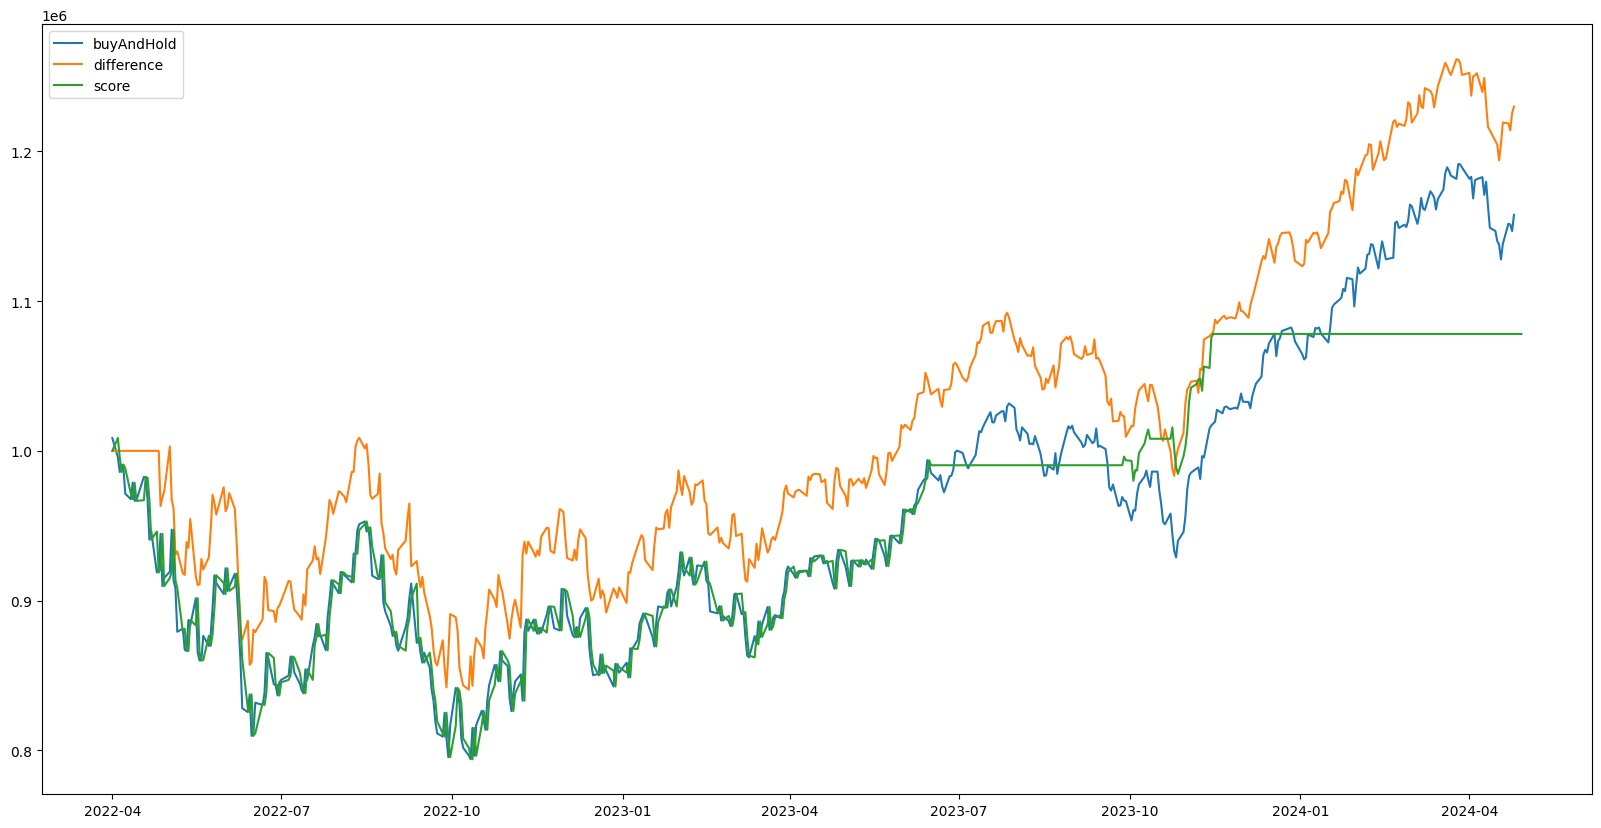

In [42]:
strategy_buyAndHold(df)
strategy_difference(df)
strategy_score(df)

# 그래프 그리기
plt.figure(figsize=(20, 10))
plt.plot(df.index[:-2], buyAndHold_plt, label="buyAndHold")
plt.plot(df.index[:-2], difference_plt, label="difference")
plt.plot(df.index, score_plt, label="score")
plt.legend()
plt.show()